In [1]:
import sys
sys.path.insert(0, '..')

import torch
import os
import wandb
import random
import numpy as np
import torch
from torch import nn
from torch.optim import Adam
from ignite.handlers.param_scheduler import create_lr_scheduler_with_warmup
from torch.utils.data import DataLoader
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from core.final.dataset import PSMDataset
from core.final.model import GalSpecNet, MetaModel, Informer
from core.final.trainer import Trainer

/global/home/users/mariia/miniforge3/envs/astro/lib/python3.10/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer


In [16]:
def get_model(config):
    if config['mode'] == 'photo':
        model = Informer(config)
    elif config['mode'] == 'spectra':
        model = GalSpecNet(config)
    elif config['mode'] == 'meta':
        model = MetaModel(config)
    else:
        model = AstroModel(config)

    return model

In [26]:
def calc_results(run_id, last_epoch):
    api = wandb.Api()
    run = api.run(run_id)
    config = run.config
    config['use_wandb'] = False

    test_dataset = PSMDataset(config, split='test')
    test_dataloader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False)
    config['num_classes'] = test_dataset.num_classes
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model = get_model(config)
    model = model.to(device)
    
    weights_path = os.path.join(config['weights_path'] + '-' + run_id.split('/')[-1], f'weights-{last_epoch}.pth')
    model.load_state_dict(torch.load(weights_path, weights_only=False))

    trainer = Trainer(model=model, optimizer=None, scheduler=None, warmup_scheduler=None, criterion=criterion, device=device, config=config)
    conf_matrix = trainer.evaluate(test_dataloader, test_dataset.id2target)
    acc = np.trace(conf_matrix) / np.sum(conf_matrix)
    
    return acc

In [27]:
meta_acc = []

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:42<00:00,  8.58s/it]


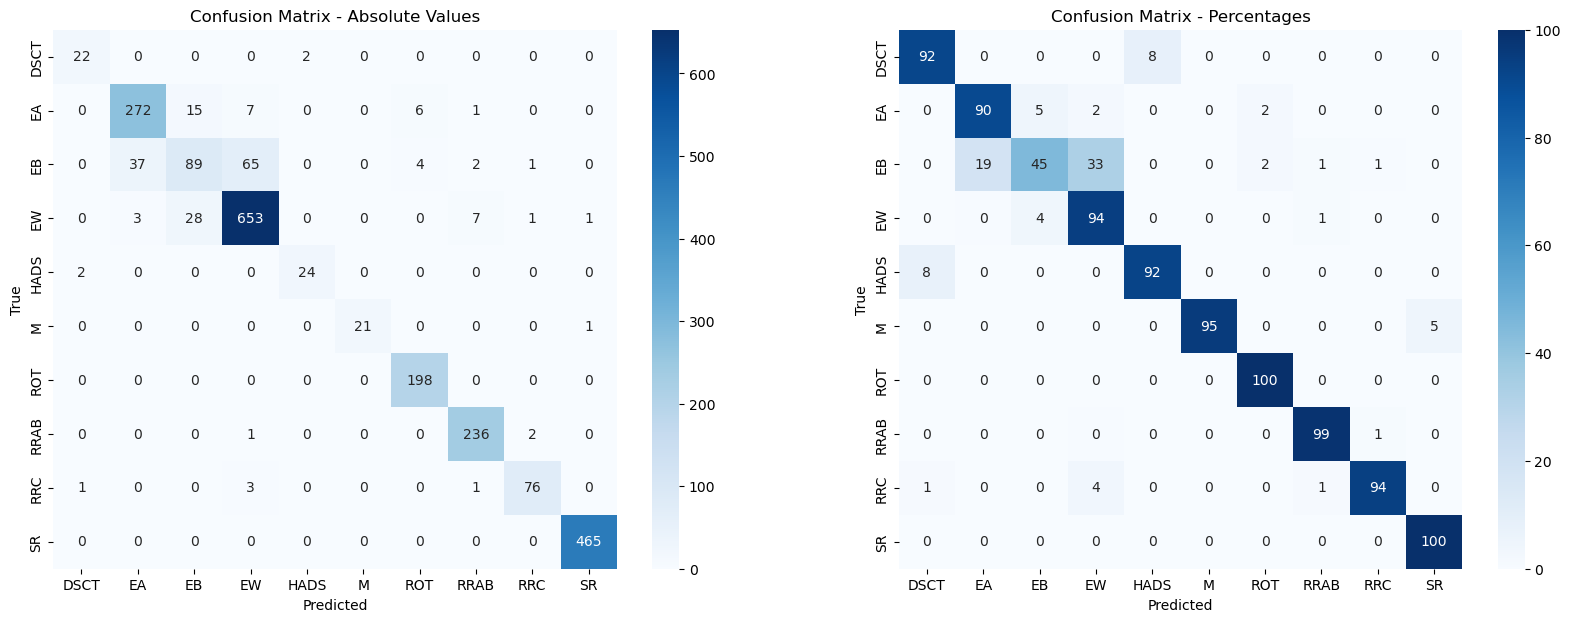

In [28]:
acc = calc_results('MeriDK/AstroCLIPResults/ie1v6sml', 49)
meta_acc.append(acc)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:40<00:00,  8.07s/it]


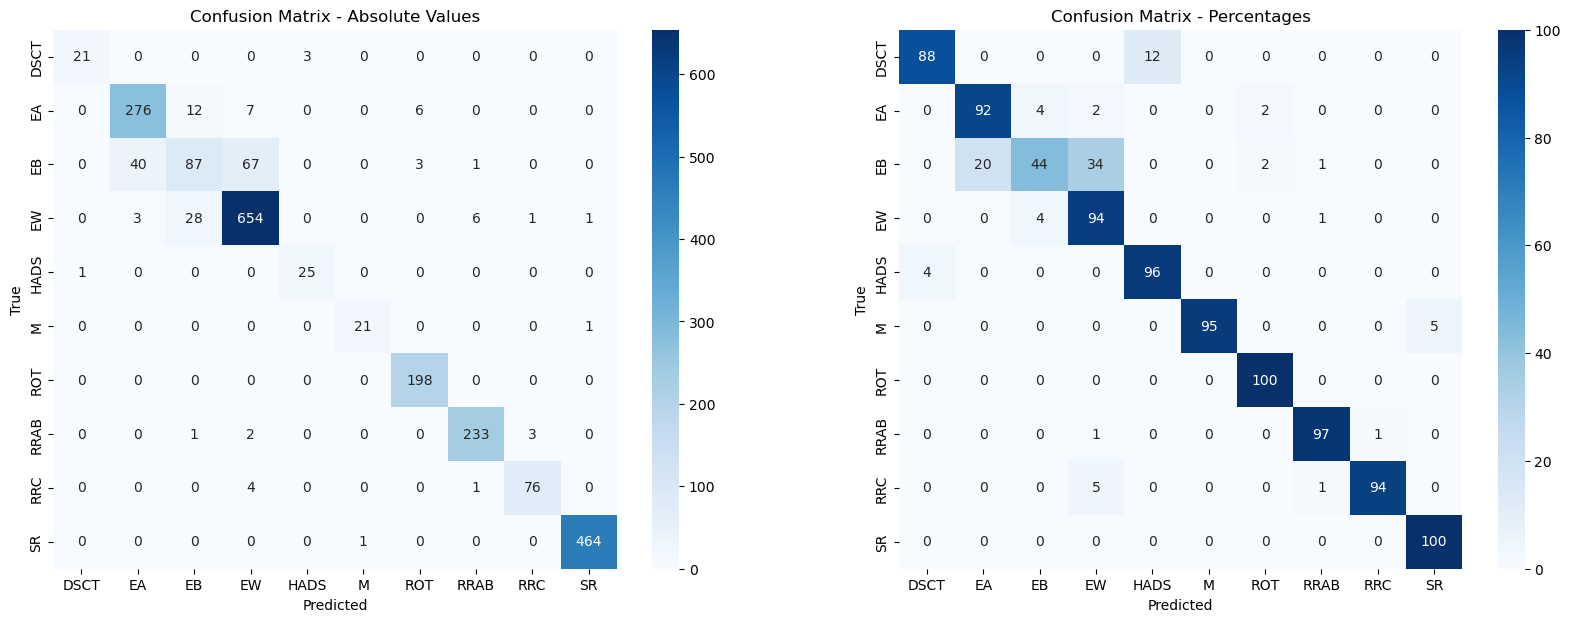

In [29]:
acc = calc_results('MeriDK/AstroCLIPResults/40ni87kv', 49)
meta_acc.append(acc)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:36<00:00,  7.35s/it]


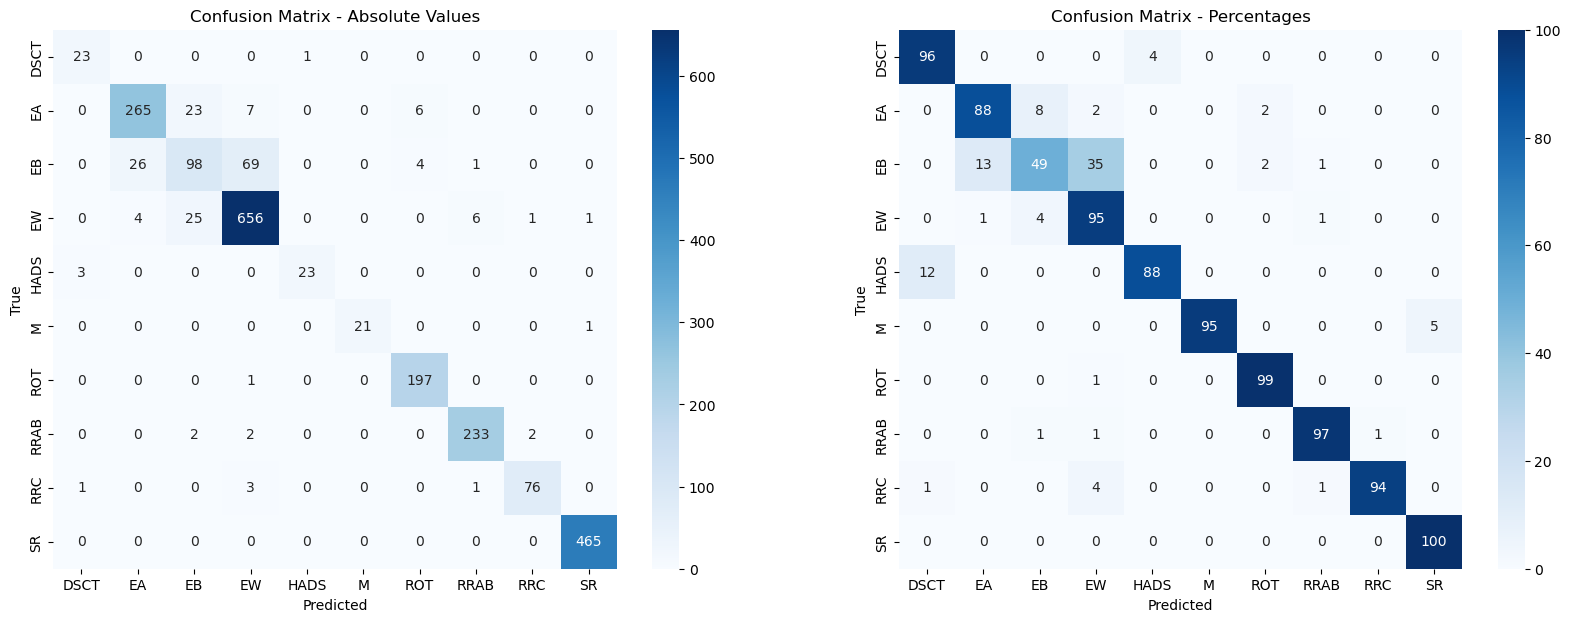

In [32]:
acc = calc_results('MeriDK/AstroCLIPResults/nhudyhng', 49)
meta_acc.append(acc)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.83s/it]


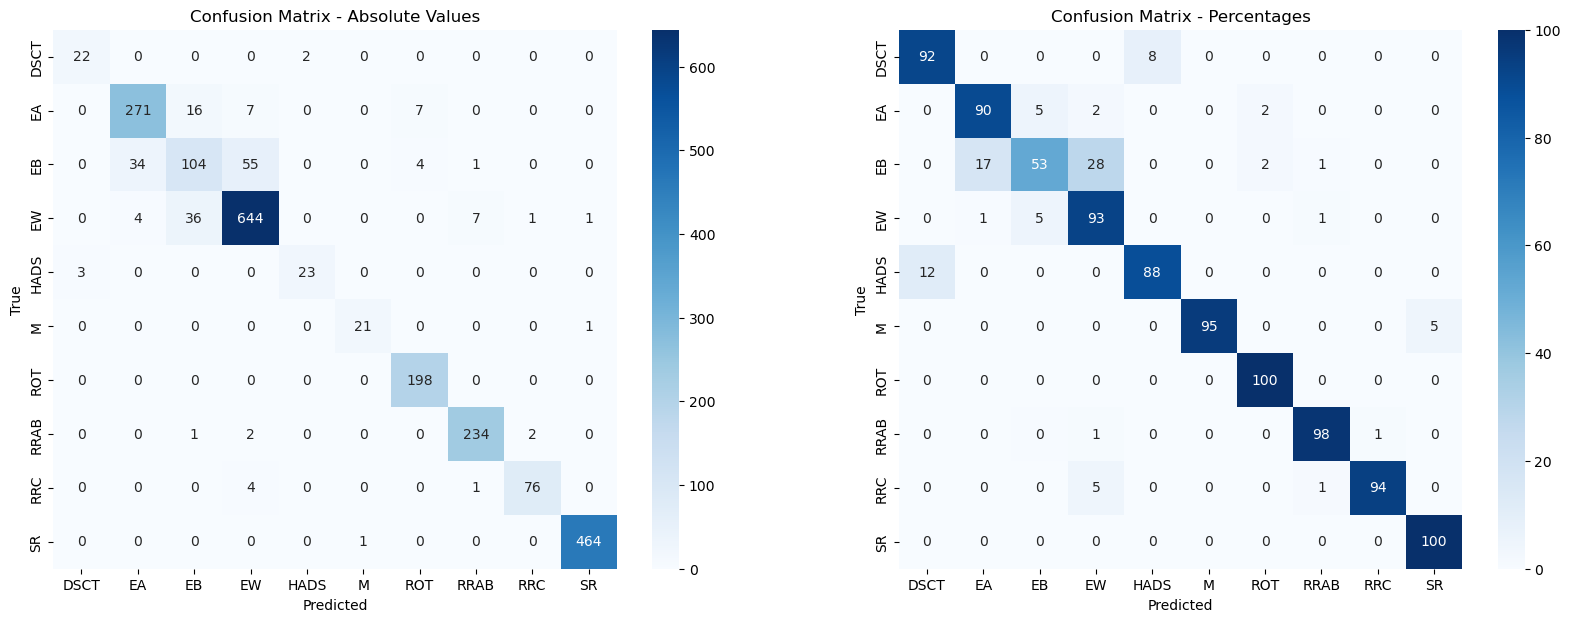

In [30]:
acc = calc_results('MeriDK/AstroCLIPResults/uz3p73ct', 49)
meta_acc.append(acc)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.94s/it]


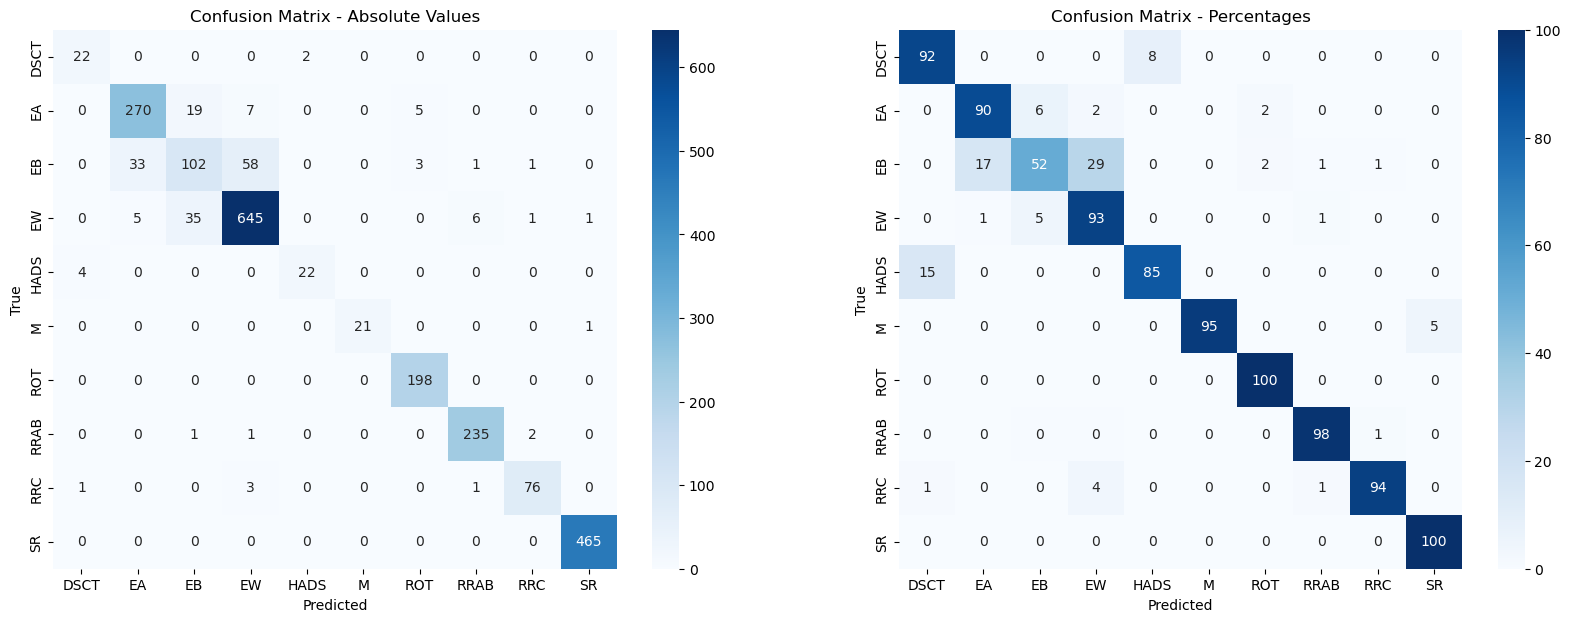

In [31]:
acc = calc_results('MeriDK/AstroCLIPResults/tebkmndy', 49)
meta_acc.append(acc)

In [34]:
np.mean(meta_acc), np.std(meta_acc)

(0.9150867823765021, 0.0003330358154672074)

In [33]:
spectra_acc = []

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:40<00:00,  8.01s/it]


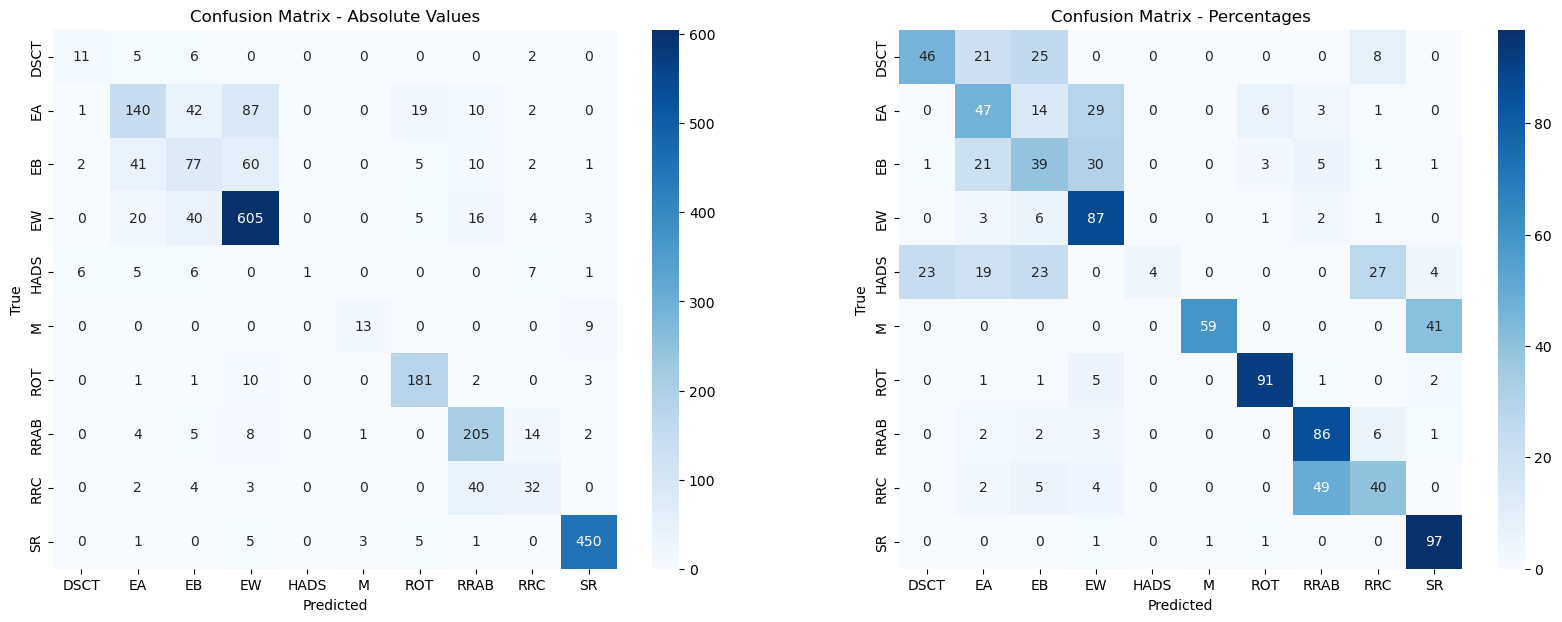

In [35]:
acc = calc_results('MeriDK/AstroCLIPResults/hwp28499', 49)
spectra_acc.append(acc)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:36<00:00,  7.21s/it]


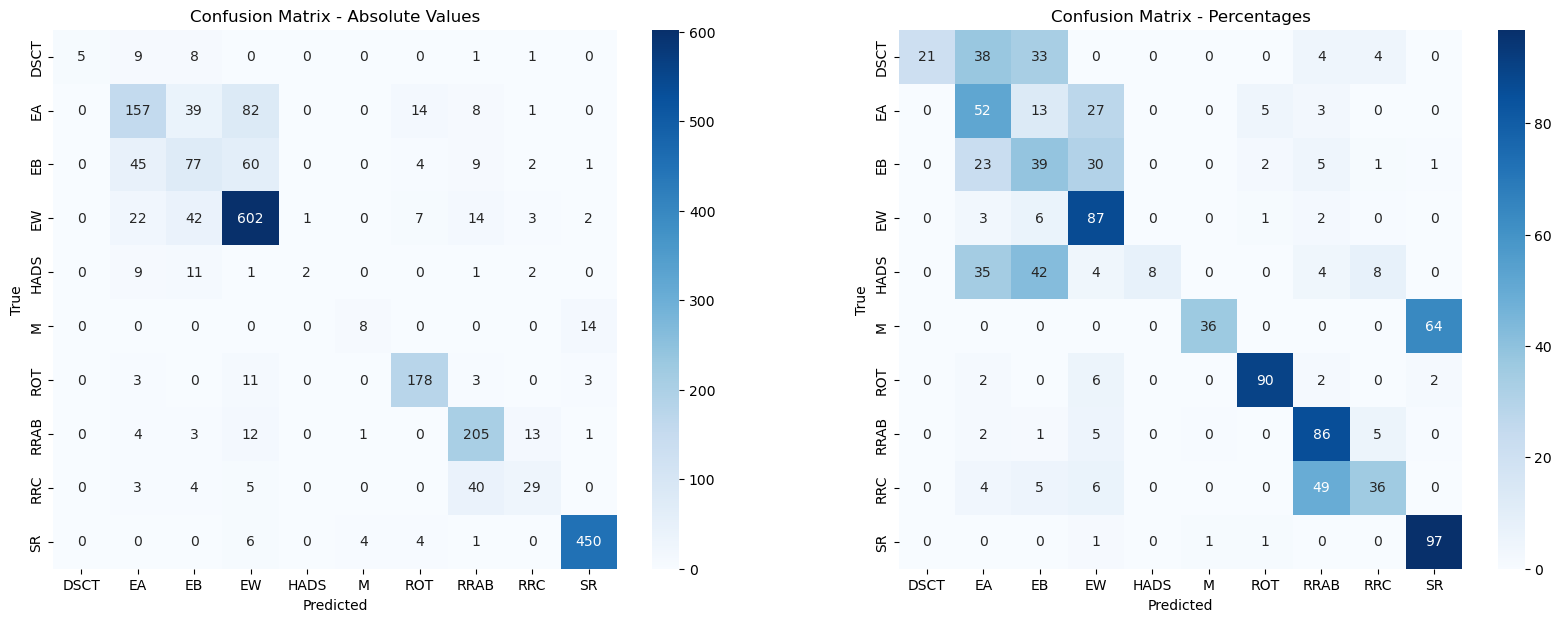

In [37]:
acc = calc_results('MeriDK/AstroCLIPResults/aqhru5yp', 49)
spectra_acc.append(acc)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.97s/it]


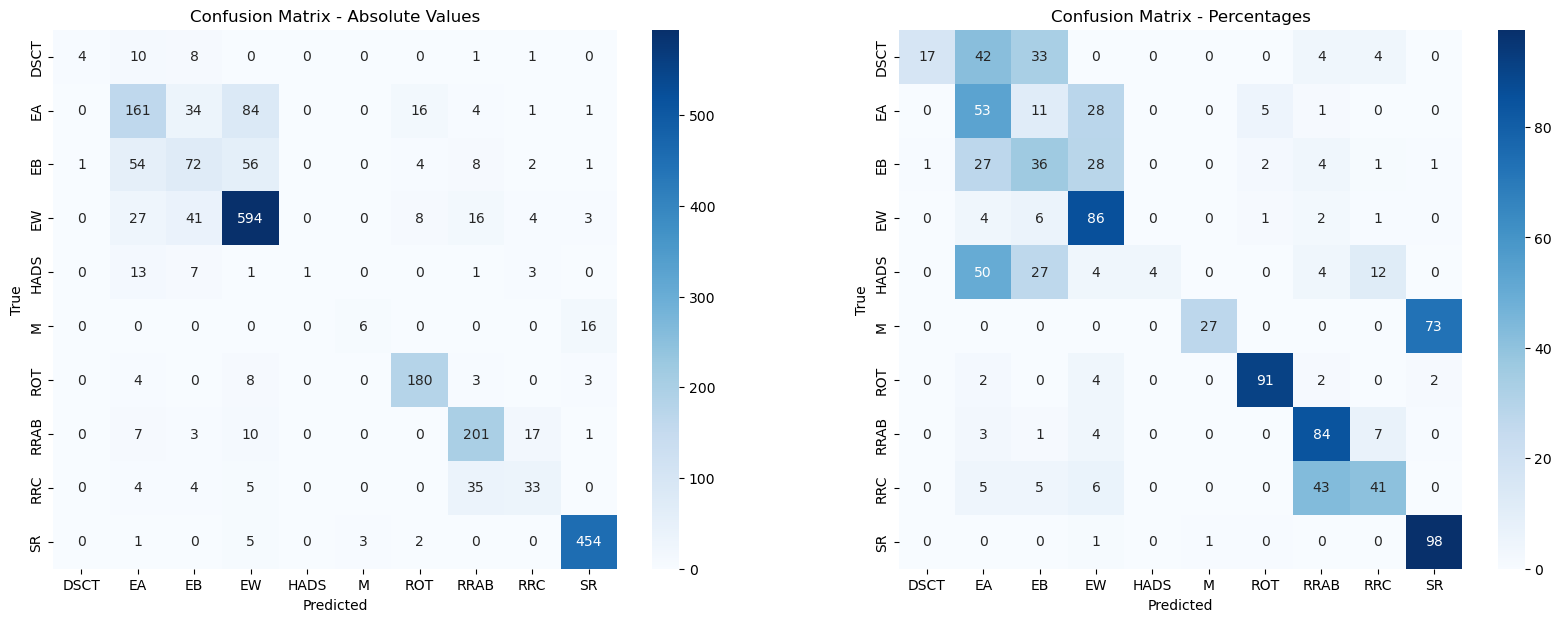

In [36]:
acc = calc_results('MeriDK/AstroCLIPResults/cd3bc24b', 49)
spectra_acc.append(acc)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.78s/it]


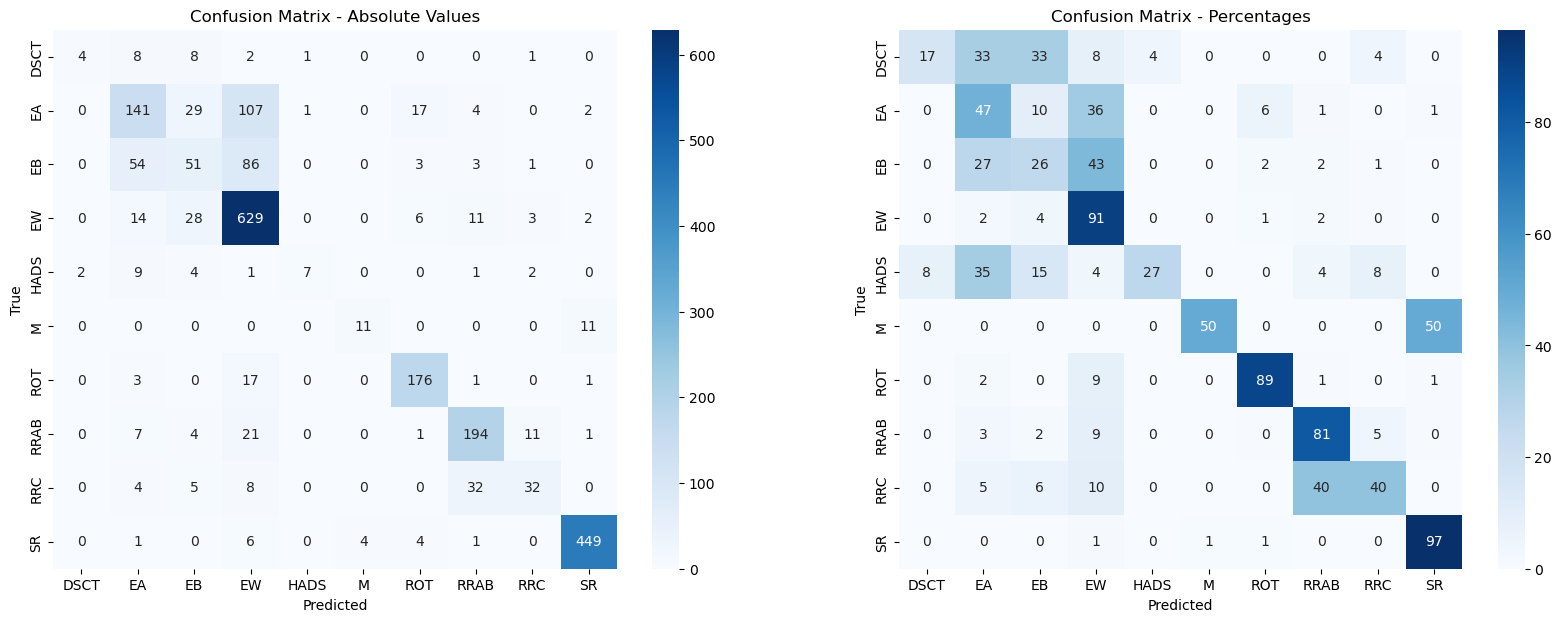

In [38]:
acc = calc_results('MeriDK/AstroCLIPResults/ugq8p42f', 49)
spectra_acc.append(acc)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.67s/it]


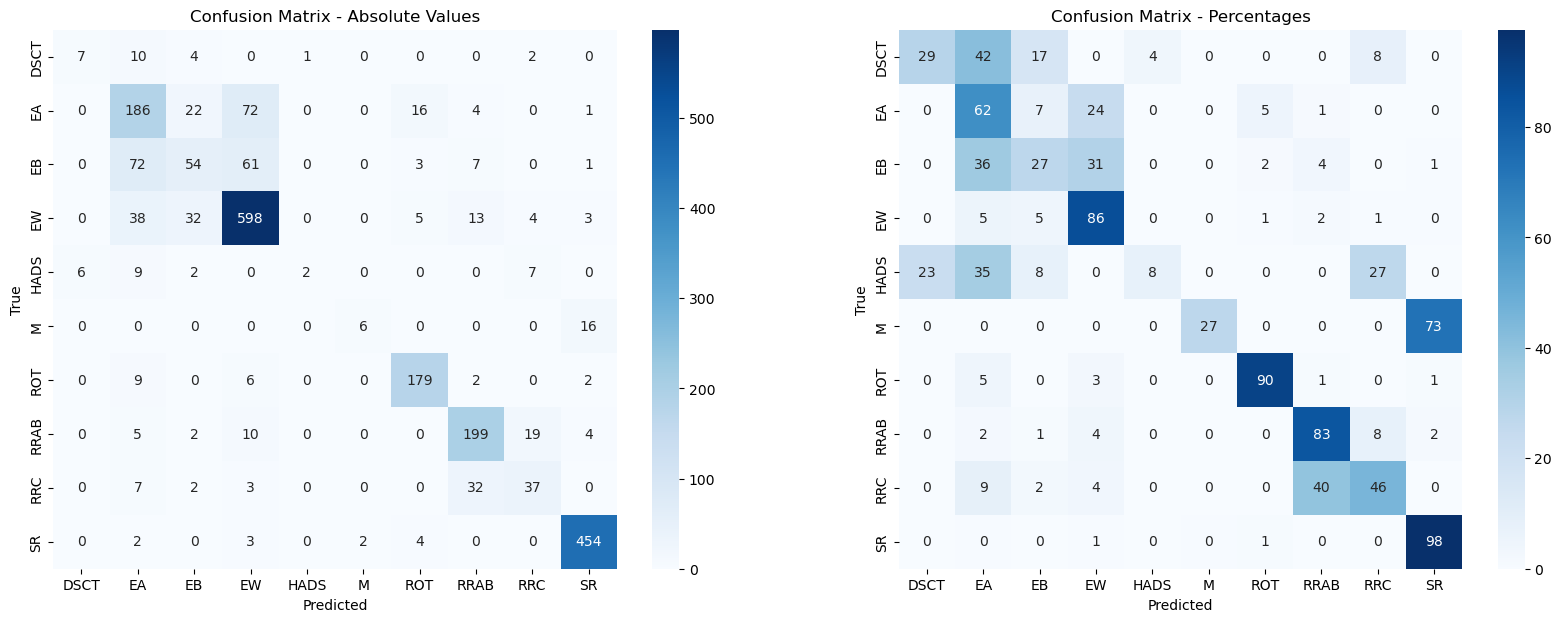

In [39]:
acc = calc_results('MeriDK/AstroCLIPResults/5bn5e4ym', 49)
spectra_acc.append(acc)

In [40]:
np.mean(spectra_acc), np.std(spectra_acc)

(0.7610146862483311, 0.00422199954628622)